In [1]:
# Load libraries
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
from scipy.stats import ttest_ind

from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn.cluster import KMeans, DBSCAN
from sklearn import metrics

In [2]:
# Load dataset
diabetes_data_binary = pd.read_csv('diabetes_data_upload.csv') 
diabetes_data_floats = pd.read_csv('diabetes-dataset.csv')

In [3]:
# Display original binary dataset
print(diabetes_data_binary.info())
diabetes_data_binary.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
5,55,Male,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,Yes,No,Yes,Yes,Yes,Positive
6,57,Male,Yes,Yes,No,Yes,Yes,Yes,No,No,No,Yes,Yes,No,No,No,Positive
7,66,Male,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,No,Yes,Yes,No,No,Positive
8,67,Male,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,Yes,Positive
9,70,Male,No,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,No,Yes,No,Positive


In [4]:
# Map string values to int for the binary dataset

# Convert Yes/No values to 1/0 values
diabetes_data_binary = diabetes_data_binary.applymap(lambda x: 1 if x=='Yes' else x)
diabetes_data_binary = diabetes_data_binary.applymap(lambda x: 0 if x=='No' else x)

# Convert Pos/Neg values to 1/0 values
diabetes_data_binary = diabetes_data_binary.applymap(lambda x: 1 if x=='Positive' else x)
diabetes_data_binary = diabetes_data_binary.applymap(lambda x: 0 if x=='Negative' else x)

# Rename Gender column to Male
diabetes_data_binary = diabetes_data_binary.rename(columns={'Gender': 'Male'})

# Convert Male/Female values to 1/0 values
diabetes_data_binary['Male'] = diabetes_data_binary['Male'].map({'Male': 1, 'Female': 0})

In [5]:
# Display binary dataset after data preparation
print(diabetes_data_binary.info())
diabetes_data_binary

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Age                 520 non-null    int64
 1   Male                520 non-null    int64
 2   Polyuria            520 non-null    int64
 3   Polydipsia          520 non-null    int64
 4   sudden weight loss  520 non-null    int64
 5   weakness            520 non-null    int64
 6   Polyphagia          520 non-null    int64
 7   Genital thrush      520 non-null    int64
 8   visual blurring     520 non-null    int64
 9   Itching             520 non-null    int64
 10  Irritability        520 non-null    int64
 11  delayed healing     520 non-null    int64
 12  partial paresis     520 non-null    int64
 13  muscle stiffness    520 non-null    int64
 14  Alopecia            520 non-null    int64
 15  Obesity             520 non-null    int64
 16  class               520 non-null    int64
dt

,Age,Male,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,0,1,1,1,0,1,0,0,1,0,1,1,0,0,0,1
516,48,0,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1
517,58,0,1,1,1,1,1,0,1,0,0,0,1,1,0,1,1
518,32,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0


In [6]:
# Display original integer/float dataset
print(diabetes_data_floats.info())
diabetes_data_floats.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB
None


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0
5,0,173,78,32,265,46.5,1.159,58,0
6,4,99,72,17,0,25.6,0.294,28,0
7,8,194,80,0,0,26.1,0.551,67,0
8,2,83,65,28,66,36.8,0.629,24,0
9,2,89,90,30,0,33.5,0.292,42,0


In [7]:
# Count missing values for integers/floats dataset

In [8]:
diabetes_data_floats[diabetes_data_floats['Glucose']==0].shape[0]

13

In [9]:
diabetes_data_floats[diabetes_data_floats['BloodPressure']==0].shape[0]

90

In [10]:
diabetes_data_floats[diabetes_data_floats['SkinThickness']==0].shape[0]

573

In [11]:
diabetes_data_floats[diabetes_data_floats['Insulin']==0].shape[0]

956

In [12]:
diabetes_data_floats[diabetes_data_floats['BMI']==0].size

252

In [13]:
# Remove all observations with missing values
diabetes_data_floats = diabetes_data_floats[diabetes_data_floats['Glucose']!=0]
diabetes_data_floats = diabetes_data_floats[diabetes_data_floats['BloodPressure']!=0]
diabetes_data_floats = diabetes_data_floats[diabetes_data_floats['SkinThickness']!=0]
diabetes_data_floats = diabetes_data_floats[diabetes_data_floats['Insulin']!=0]
diabetes_data_floats = diabetes_data_floats[diabetes_data_floats['BMI']!=0]

In [14]:
# Display integer/float dataset after data cleaning
print(diabetes_data_floats.info())
diabetes_data_floats.head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1035 entries, 1 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               1035 non-null   int64  
 1   Glucose                   1035 non-null   int64  
 2   BloodPressure             1035 non-null   int64  
 3   SkinThickness             1035 non-null   int64  
 4   Insulin                   1035 non-null   int64  
 5   BMI                       1035 non-null   float64
 6   DiabetesPedigreeFunction  1035 non-null   float64
 7   Age                       1035 non-null   int64  
 8   Outcome                   1035 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 80.9 KB
None


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,0,84,82,31,125,38.2,0.233,23,0
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0
5,0,173,78,32,265,46.5,1.159,58,0
8,2,83,65,28,66,36.8,0.629,24,0
11,4,125,70,18,122,28.9,1.144,45,1
15,2,81,72,15,76,30.1,0.547,25,0
16,7,195,70,33,145,25.1,0.163,55,1
17,6,154,74,32,193,29.3,0.839,39,0
18,2,117,90,19,71,25.2,0.313,21,0


In [15]:
# Computing averages for diabetic and non-diabetic patients using integer/floats dataset

In [16]:
print("Pregnancies")
print("Non-Diabetic Mean:", diabetes_data_floats[diabetes_data_floats['Outcome']==0]['Pregnancies'].mean())
print("Diabetic Mean    :", diabetes_data_floats[diabetes_data_floats['Outcome']==1]['Pregnancies'].mean())
print()
print("Non-Diabetic std :", diabetes_data_floats[diabetes_data_floats['Outcome']==0]['Pregnancies'].std())
print("Diabetic std     :", diabetes_data_floats[diabetes_data_floats['Outcome']==1]['Pregnancies'].std())
print()
ttest_ind(diabetes_data_floats[diabetes_data_floats['Outcome']==1]['Pregnancies'], diabetes_data_floats[diabetes_data_floats['Outcome']==0]['Pregnancies'], equal_var=False)

Pregnancies
Non-Diabetic Mean: 2.603151862464183
Diabetic Mean    : 4.3916913946587535

Non-Diabetic std : 2.5541686931203613
Diabetic std     : 3.896081951287212



Ttest_indResult(statistic=7.669055764939621, pvalue=9.717868756815654e-14)

In [17]:
print("Glucose")
print("Non-Diabetic Mean:", diabetes_data_floats[diabetes_data_floats['Outcome']==0]['Glucose'].mean())
print("Diabetic Mean    :", diabetes_data_floats[diabetes_data_floats['Outcome']==1]['Glucose'].mean())
print()
print("Non-Diabetic std :", diabetes_data_floats[diabetes_data_floats['Outcome']==0]['Glucose'].std())
print("Diabetic std     :", diabetes_data_floats[diabetes_data_floats['Outcome']==1]['Glucose'].std())
print()
ttest_ind(diabetes_data_floats[diabetes_data_floats['Outcome']==1]['Glucose'], diabetes_data_floats[diabetes_data_floats['Outcome']==0]['Glucose'], equal_var=False)

Glucose
Non-Diabetic Mean: 111.7378223495702
Diabetic Mean    : 145.84272997032642

Non-Diabetic std : 24.606662425248665
Diabetic std     : 29.136106337756967



Ttest_indResult(statistic=18.53284052946368, pvalue=1.862453776362188e-60)

In [18]:
print("BloodPressure ")
print("Non-Diabetic Mean:", diabetes_data_floats[diabetes_data_floats['Outcome']==0]['BloodPressure'].mean())
print("Diabetic Mean    :", diabetes_data_floats[diabetes_data_floats['Outcome']==1]['BloodPressure'].mean())
print()
print("Non-Diabetic std :", diabetes_data_floats[diabetes_data_floats['Outcome']==0]['BloodPressure'].std())
print("Diabetic std     :", diabetes_data_floats[diabetes_data_floats['Outcome']==1]['BloodPressure'].std())
print()
ttest_ind(diabetes_data_floats[diabetes_data_floats['Outcome']==1]['BloodPressure'], diabetes_data_floats[diabetes_data_floats['Outcome']==0]['BloodPressure'], equal_var=False)

BloodPressure 
Non-Diabetic Mean: 68.98424068767908
Diabetic Mean    : 74.5727002967359

Non-Diabetic std : 11.792249153445498
Diabetic std     : 12.59942232740515



Ttest_indResult(statistic=6.825979203640128, pvalue=2.0666122575138323e-11)

In [19]:
print("SkinThickness ")
print("Non-Diabetic Mean:", diabetes_data_floats[diabetes_data_floats['Outcome']==0]['SkinThickness'].mean())
print("Diabetic Mean    :", diabetes_data_floats[diabetes_data_floats['Outcome']==1]['SkinThickness'].mean())
print()
print("Non-Diabetic std :", diabetes_data_floats[diabetes_data_floats['Outcome']==0]['SkinThickness'].std())
print("Diabetic std     :", diabetes_data_floats[diabetes_data_floats['Outcome']==1]['SkinThickness'].std())
print()
ttest_ind(diabetes_data_floats[diabetes_data_floats['Outcome']==1]['SkinThickness'], diabetes_data_floats[diabetes_data_floats['Outcome']==0]['SkinThickness'], equal_var=False)

SkinThickness 
Non-Diabetic Mean: 27.302292263610315
Diabetic Mean    : 33.32640949554896

Non-Diabetic std : 10.291672911794016
Diabetic std     : 9.941809106994034



Ttest_indResult(statistic=9.0301455996166, pvalue=1.7188263087543889e-18)

In [20]:
print("Insulin ")
print("Non-Diabetic Mean:", diabetes_data_floats[diabetes_data_floats['Outcome']==0]['Insulin'].mean())
print("Diabetic Mean    :", diabetes_data_floats[diabetes_data_floats['Outcome']==1]['Insulin'].mean())
print()
print("Non-Diabetic std :", diabetes_data_floats[diabetes_data_floats['Outcome']==0]['Insulin'].std())
print("Diabetic std     :", diabetes_data_floats[diabetes_data_floats['Outcome']==1]['Insulin'].std())
print()
ttest_ind(diabetes_data_floats[diabetes_data_floats['Outcome']==1]['Insulin'], diabetes_data_floats[diabetes_data_floats['Outcome']==0]['Insulin'], equal_var=False)

Insulin 
Non-Diabetic Mean: 131.3595988538682
Diabetic Mean    : 200.7299703264095

Non-Diabetic std : 99.73279034570395
Diabetic std     : 119.84536697766426



Ttest_indResult(statistic=9.198817762526524, pvalue=6.848789084574853e-19)

In [21]:
print("BMI ")
print("Non-Diabetic Mean:", diabetes_data_floats[diabetes_data_floats['Outcome']==0]['BMI'].mean())
print("Diabetic Mean    :", diabetes_data_floats[diabetes_data_floats['Outcome']==1]['BMI'].mean())
print()
print("Non-Diabetic std :", diabetes_data_floats[diabetes_data_floats['Outcome']==0]['BMI'].std())
print("Diabetic std     :", diabetes_data_floats[diabetes_data_floats['Outcome']==1]['BMI'].std())
print()
ttest_ind(diabetes_data_floats[diabetes_data_floats['Outcome']==1]['BMI'], diabetes_data_floats[diabetes_data_floats['Outcome']==0]['BMI'], equal_var=False)

BMI 
Non-Diabetic Mean: 32.08939828080231
Diabetic Mean    : 35.83086053412462

Non-Diabetic std : 6.847662059242314
Diabetic std     : 6.949854197349747



Ttest_indResult(statistic=8.154776053796434, pvalue=1.7833653506931635e-15)

In [22]:
print("Diabetes Pedigree Function")
print("Non-Diabetic Mean:", diabetes_data_floats[diabetes_data_floats['Outcome']==0]['DiabetesPedigreeFunction'].mean())
print("Diabetic Mean    :", diabetes_data_floats[diabetes_data_floats['Outcome']==1]['DiabetesPedigreeFunction'].mean())
print()
print("Non-Diabetic std :", diabetes_data_floats[diabetes_data_floats['Outcome']==0]['DiabetesPedigreeFunction'].std())
print("Diabetic std     :", diabetes_data_floats[diabetes_data_floats['Outcome']==1]['DiabetesPedigreeFunction'].std())
print()
ttest_ind(diabetes_data_floats[diabetes_data_floats['Outcome']==1]['DiabetesPedigreeFunction'], diabetes_data_floats[diabetes_data_floats['Outcome']==0]['DiabetesPedigreeFunction'], equal_var=False)

Diabetes Pedigree Function
Non-Diabetic Mean: 0.47991977077363884
Diabetic Mean    : 0.6117329376854598

Non-Diabetic std : 0.293957573889509
Diabetic std     : 0.3857392946867761



Ttest_indResult(statistic=5.543824040855261, pvalue=4.670348451789813e-08)

In [23]:
# Visualize feature statistics for non-diabetic and diabetic patients using integer/floats dataset

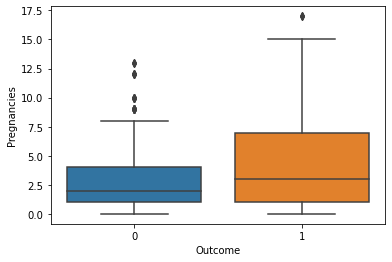

In [24]:
sns.boxplot(x='Outcome',y='Pregnancies',data=diabetes_data_floats)

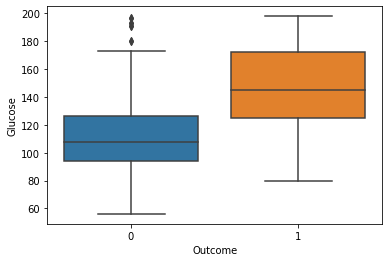

In [25]:
sns.boxplot(x='Outcome',y='Glucose',data=diabetes_data_floats)

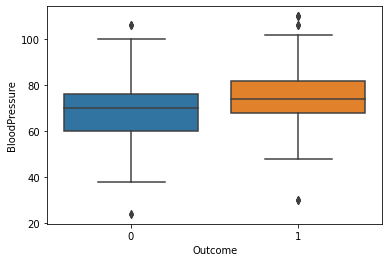

In [26]:
sns.boxplot(x='Outcome',y='BloodPressure',data=diabetes_data_floats)

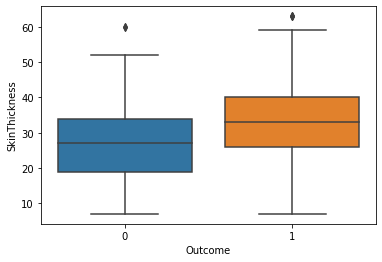

In [27]:
sns.boxplot(x='Outcome',y='SkinThickness',data=diabetes_data_floats)

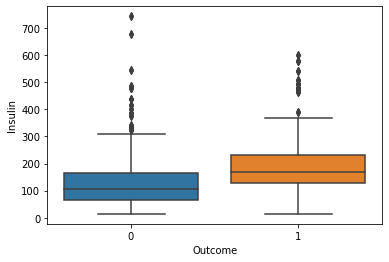

In [28]:
sns.boxplot(x='Outcome',y='Insulin',data=diabetes_data_floats)

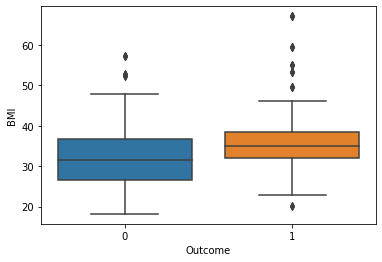

In [29]:
sns.boxplot(x='Outcome',y='BMI',data=diabetes_data_floats)

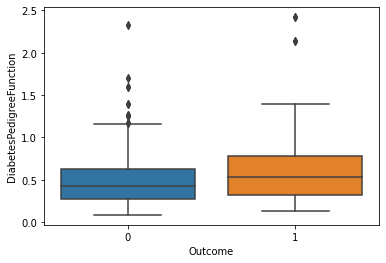

In [30]:
sns.boxplot(x='Outcome',y='DiabetesPedigreeFunction',data=diabetes_data_floats)

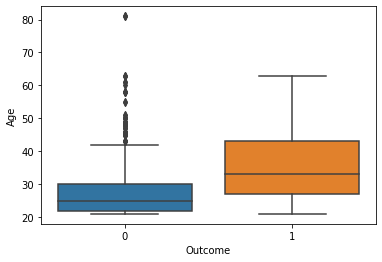

In [31]:
sns.boxplot(x='Outcome',y='Age',data=diabetes_data_floats)

In [32]:
# Visualize feature statistics for non-diabetic and diabetic patients using binary dataset

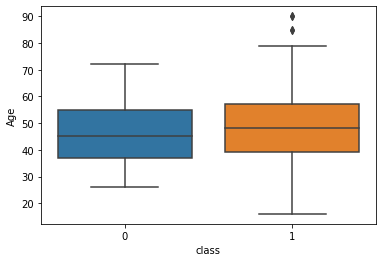

In [33]:
sns.boxplot(x='class',y='Age',data=diabetes_data_binary)

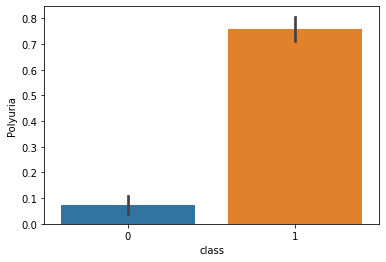

In [34]:
sns.barplot(x='class',y='Polyuria',data=diabetes_data_binary)

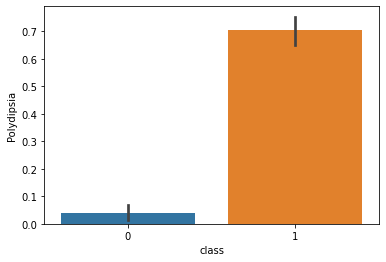

In [35]:
sns.barplot(x='class',y='Polydipsia',data=diabetes_data_binary)

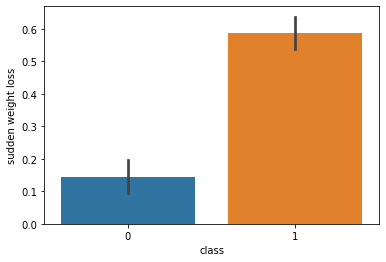

In [36]:
sns.barplot(x='class',y='sudden weight loss',data=diabetes_data_binary)

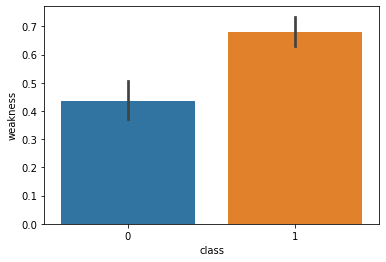

In [37]:
sns.barplot(x='class',y='weakness',data=diabetes_data_binary)

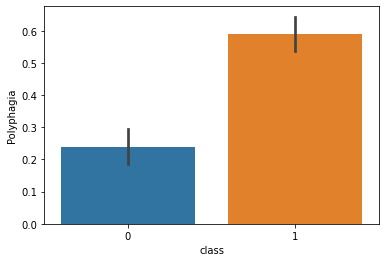

In [38]:
sns.barplot(x='class',y='Polyphagia',data=diabetes_data_binary)

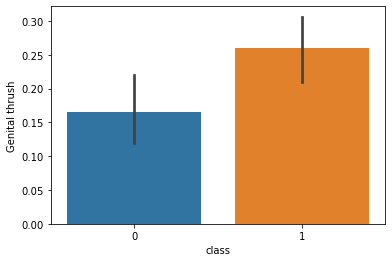

In [39]:
sns.barplot(x='class',y='Genital thrush',data=diabetes_data_binary)

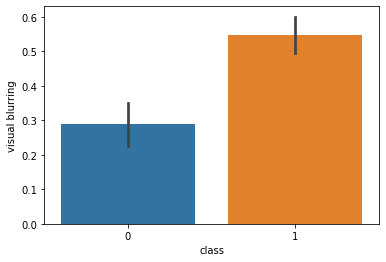

In [40]:
sns.barplot(x='class',y='visual blurring',data=diabetes_data_binary)

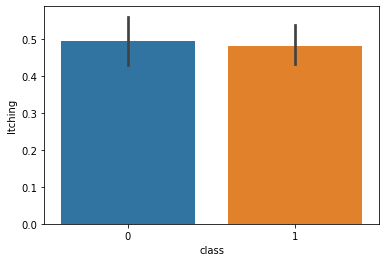

In [41]:
sns.barplot(x='class',y='Itching',data=diabetes_data_binary)

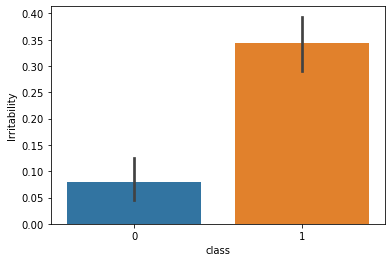

In [42]:
sns.barplot(x='class',y='Irritability',data=diabetes_data_binary)

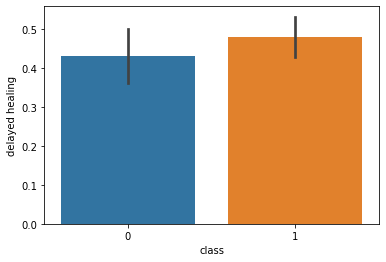

In [43]:
sns.barplot(x='class',y='delayed healing',data=diabetes_data_binary)

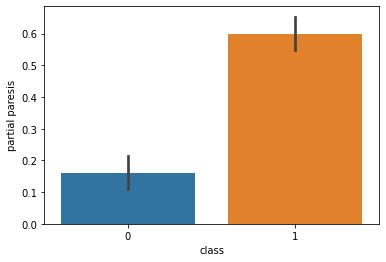

In [44]:
sns.barplot(x='class',y='partial paresis',data=diabetes_data_binary)

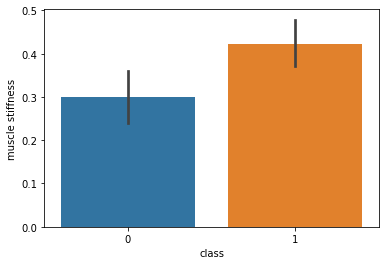

In [45]:
sns.barplot(x='class',y='muscle stiffness',data=diabetes_data_binary)

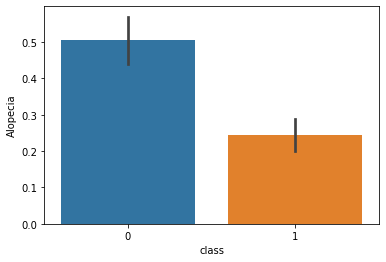

In [46]:
sns.barplot(x='class',y='Alopecia',data=diabetes_data_binary)

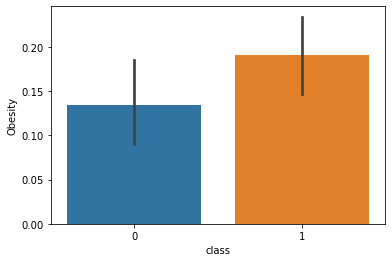

In [47]:
sns.barplot(x='class',y='Obesity',data=diabetes_data_binary)

In [48]:
#Clustering for float values

In [50]:
X = diabetes_data_floats[['Glucose','Age']]
Y = diabetes_data_floats['Outcome']

In [51]:
scaler = StandardScaler() 
scaler.fit(X)
X_scaled = scaler.transform(X) 

In [52]:
#Hierarchical Clustering with single linkage

In [53]:
clustering = linkage(X_scaled,method = 'single',metric = 'euclidean')

In [54]:
clusters = fcluster(clustering, 2,criterion = 'maxclust')

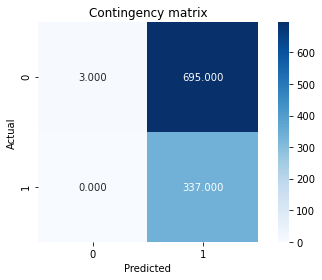

In [55]:
cont_matrix = metrics.cluster.contingency_matrix(Y,clusters)
sns.heatmap(cont_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Contingency matrix')
plt.tight_layout()

In [56]:
adjusted_rand_index = metrics.adjusted_rand_score(Y, clusters)
silhouette_coefficient = metrics.silhouette_score(X_scaled, clusters, metric = "euclidean")
print([adjusted_rand_index, silhouette_coefficient])

[-0.002971064344048915, 0.6390754085237301]


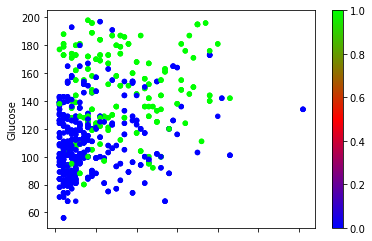

In [57]:
ax = diabetes_data_floats.plot(kind = 'scatter', x = 'Age', y = 'Glucose', c = Y, colormap = plt.cm.brg)

In [58]:
#Hierarchical Clustering with complete linkage

In [59]:
clustering = linkage(X_scaled, method = "complete", metric = "euclidean")
clusters = fcluster(clustering, 2, criterion = 'maxclust')

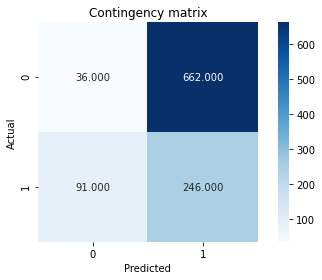

In [60]:
cont_matrix = metrics.cluster.contingency_matrix(Y,clusters)
sns.heatmap(cont_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Contingency matrix')
plt.tight_layout()

In [61]:
adjusted_rand_index = metrics.adjusted_rand_score(Y, clusters)
silhouette_coefficient = metrics.silhouette_score(X_scaled, clusters, metric = "euclidean")
print([adjusted_rand_index, silhouette_coefficient])

[0.14774195488245104, 0.45156569663251434]


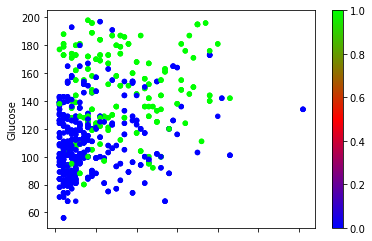

In [62]:
ax = diabetes_data_floats.plot(kind = 'scatter', x = 'Age', y = 'Glucose', c = Y, colormap = plt.cm.brg)

In [63]:
#KMeans Clustering iteration = 2

In [64]:
clustering = KMeans(n_clusters = 2, init = 'random', n_init = 2, random_state = 0).fit(X_scaled)
clusters = clustering.labels_

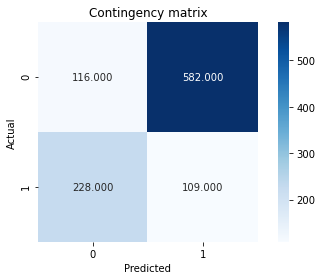

In [65]:
cont_matrix = metrics.cluster.contingency_matrix(Y,clusters)
sns.heatmap(cont_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Contingency matrix')
plt.tight_layout()

In [66]:
adjusted_rand_index = metrics.adjusted_rand_score(Y, clusters)
silhouette_coefficient = metrics.silhouette_score(X_scaled, clusters, metric = "euclidean")
print([adjusted_rand_index, silhouette_coefficient])

[0.30950793764116014, 0.4665987739498071]


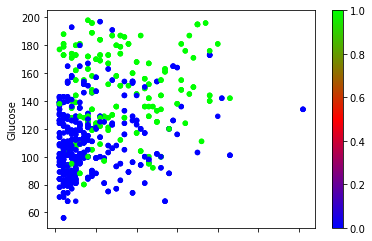

In [67]:
ax = diabetes_data_floats.plot(kind = 'scatter', x = 'Age', y = 'Glucose', c = Y, colormap = plt.cm.brg)

In [68]:
#KMeans using k-means++ iteration

In [69]:
clustering = KMeans(n_clusters = 2, init = 'k-means++', n_init = 10,random_state = 0).fit(X_scaled)
# clustering = KMeans(n_clusters = 4, init = 'random', n_init = 20, random_state = 0).fit(X)
clusters = clustering.labels_

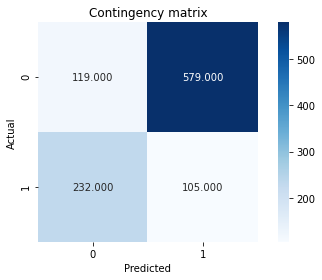

In [70]:
cont_matrix = metrics.cluster.contingency_matrix(Y,clusters)
sns.heatmap(cont_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Contingency matrix')
plt.tight_layout()

In [71]:
adjusted_rand_index = metrics.adjusted_rand_score(Y, clusters)
silhouette_coefficient = metrics.silhouette_score(X_scaled, clusters, metric = "euclidean")
print([adjusted_rand_index, silhouette_coefficient])

[0.31247705870741294, 0.46646027539964413]


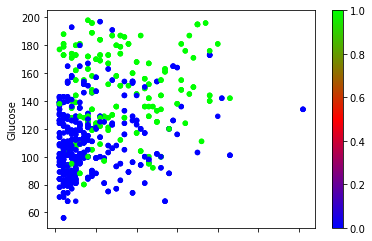

In [72]:
ax = diabetes_data_floats.plot(kind = 'scatter', x = 'Age', y = 'Glucose', c = Y, colormap = plt.cm.brg)

In [73]:
#DBSCAN Clustering 

In [74]:
clustering = DBSCAN(eps = 1, min_samples = 5, metric = "euclidean").fit(X_scaled)
clusters = clustering.labels_
print(clusters)

[0 0 0 ... 0 0 0]


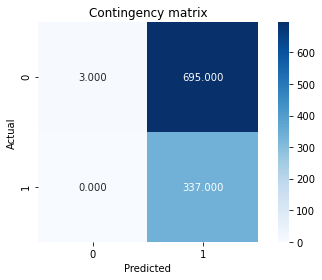

In [75]:
# Plot contingency matrix
cont_matrix = metrics.cluster.contingency_matrix(Y, clusters)
sns.heatmap(cont_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Contingency matrix')
plt.tight_layout()

In [76]:
adjusted_rand_index = metrics.adjusted_rand_score(Y, clusters)
silhouette_coefficient = metrics.silhouette_score(X_scaled, clusters, metric = "euclidean")
print([adjusted_rand_index, silhouette_coefficient])

[-0.002971064344048915, 0.6390754085237301]


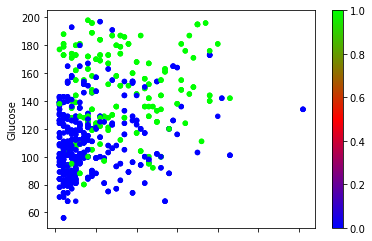

In [77]:
ax = diabetes_data_floats.plot(kind = 'scatter', x = 'Age', y = 'Glucose', c = Y, colormap = plt.cm.brg)

In [78]:
# Evaluation Matrix

In [79]:
silhouette_coefficient = metrics.silhouette_score(X, Y, metric = "euclidean")
print(silhouette_coefficient)

0.2439618155705361


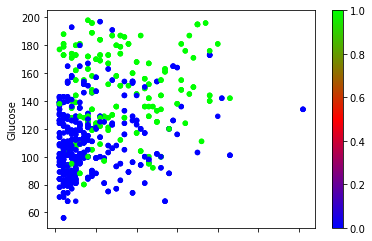

In [81]:
ax = diabetes_data_floats.plot(kind = 'scatter', x = 'Age', y = 'Glucose', c = Y, colormap = plt.cm.brg)

In [82]:
#Clustering for Binary Data

In [83]:
##Choosing the variables that have higher impact on diabetic vs non-diabetic for binary values

In [84]:
_X = diabetes_data_binary[["Polyuria", "Polydipsia","sudden weight loss"]]

In [85]:
_Y = diabetes_data_binary["class"]

In [86]:
scaler = StandardScaler() 
scaler.fit(_X)
_X_scaled = scaler.transform(_X) 

In [87]:
#Hierarchical Clustering with single linkage

In [88]:
clustering = linkage(_X_scaled,method = 'single',metric = 'euclidean')
clusters = fcluster(clustering, 2,criterion = 'maxclust')

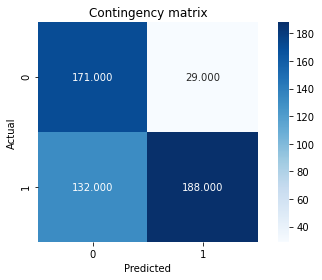

In [89]:
cont_matrix = metrics.cluster.contingency_matrix(_Y,clusters)
sns.heatmap(cont_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Contingency matrix')
plt.tight_layout()

In [90]:
adjusted_rand_index = metrics.adjusted_rand_score(_Y, clusters)
silhouette_coefficient = metrics.silhouette_score(_X_scaled, clusters, metric = "euclidean")
print([adjusted_rand_index, silhouette_coefficient])

[0.14221378834411882, 0.5201879140451119]


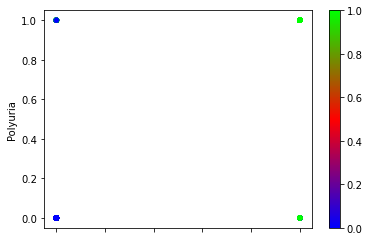

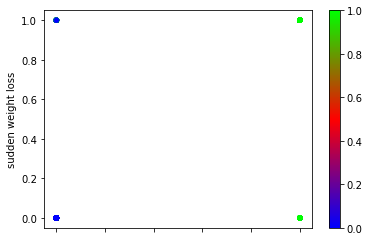

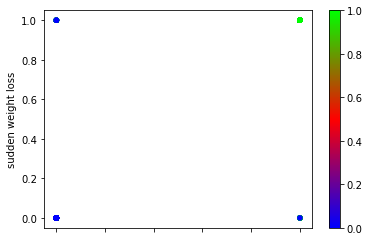

In [91]:
ax = diabetes_data_binary.plot(kind = 'scatter', x = 'Polydipsia', y = 'Polyuria', c = _Y, colormap = plt.cm.brg)
ax = diabetes_data_binary.plot(kind = 'scatter', x = 'Polydipsia', y = "sudden weight loss", c = _Y, colormap = plt.cm.brg)
ax = diabetes_data_binary.plot(kind = 'scatter', x = 'Polyuria', y = 'sudden weight loss', c = _Y, colormap = plt.cm.brg)

In [92]:
#Hierarchical Clustering with complete linkage

In [93]:
clustering = linkage(_X_scaled, method = "complete", metric = "euclidean")
clusters = fcluster(clustering, 2, criterion = 'maxclust')

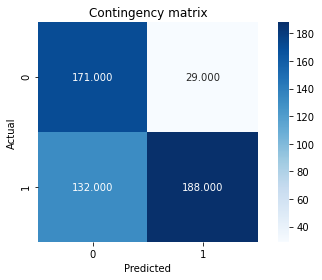

In [94]:
cont_matrix = metrics.cluster.contingency_matrix(_Y,clusters)
sns.heatmap(cont_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Contingency matrix')
plt.tight_layout()

In [95]:
adjusted_rand_index = metrics.adjusted_rand_score(_Y, clusters)
silhouette_coefficient = metrics.silhouette_score(_X_scaled, clusters, metric = "euclidean")
print([adjusted_rand_index, silhouette_coefficient])

[0.14221378834411882, 0.5201879140451119]


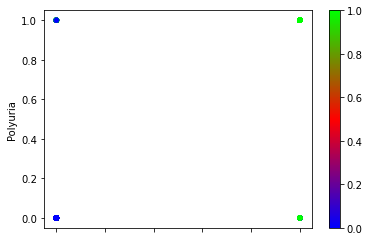

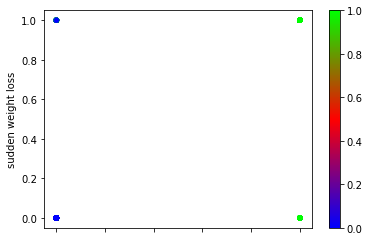

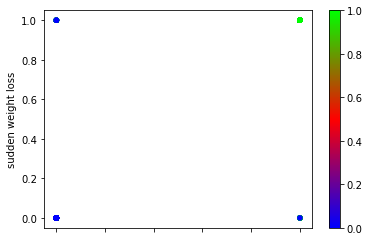

In [96]:
ax = diabetes_data_binary.plot(kind = 'scatter', x = 'Polydipsia', y = 'Polyuria', c = _Y, colormap = plt.cm.brg)
ax = diabetes_data_binary.plot(kind = 'scatter', x = 'Polydipsia', y = "sudden weight loss", c = _Y, colormap = plt.cm.brg)
ax = diabetes_data_binary.plot(kind = 'scatter', x = 'Polyuria', y = 'sudden weight loss', c = _Y, colormap = plt.cm.brg)

In [97]:
#KMeans clustering with random centroids and 1 iteration

In [98]:
clustering = KMeans(n_clusters = 2, init = 'random', n_init = 1, random_state = 0).fit(_X_scaled)
clusters = clustering.labels_

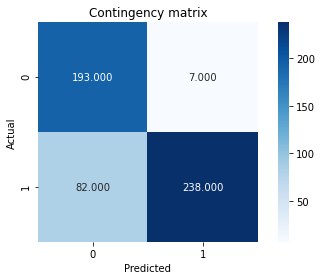

In [99]:
cont_matrix = metrics.cluster.contingency_matrix(_Y,clusters)
sns.heatmap(cont_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Contingency matrix')
plt.tight_layout()

In [100]:
adjusted_rand_index = metrics.adjusted_rand_score(_Y, clusters)
silhouette_coefficient = metrics.silhouette_score(_X_scaled, clusters, metric = "euclidean")
print([adjusted_rand_index, silhouette_coefficient])

[0.4314246629888752, 0.582550930073258]


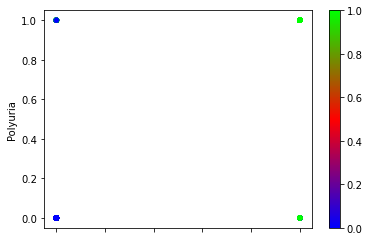

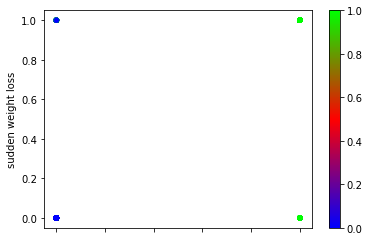

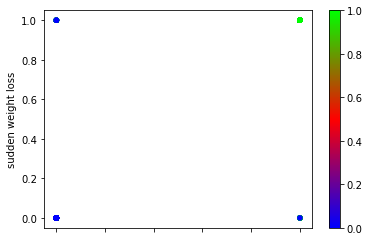

In [101]:
ax = diabetes_data_binary.plot(kind = 'scatter', x = 'Polydipsia', y = 'Polyuria', c = _Y, colormap = plt.cm.brg)
ax = diabetes_data_binary.plot(kind = 'scatter', x = 'Polydipsia', y = "sudden weight loss", c = _Y, colormap = plt.cm.brg)
ax = diabetes_data_binary.plot(kind = 'scatter', x = 'Polyuria', y = 'sudden weight loss', c = _Y, colormap = plt.cm.brg)

In [102]:
#KMeans with kmeans++ and 10 iterations

In [103]:
clustering = KMeans(n_clusters = 2, init = 'k-means++', n_init = 10,random_state = 0).fit(_X_scaled)
clusters = clustering.labels_

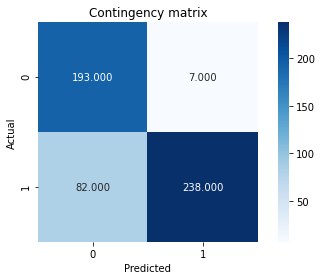

In [104]:
cont_matrix = metrics.cluster.contingency_matrix(_Y,clusters)
sns.heatmap(cont_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Contingency matrix')
plt.tight_layout()

In [105]:
adjusted_rand_index = metrics.adjusted_rand_score(_Y, clusters)
silhouette_coefficient = metrics.silhouette_score(_X_scaled, clusters, metric = "euclidean")
print([adjusted_rand_index, silhouette_coefficient])

[0.4314246629888752, 0.582550930073258]


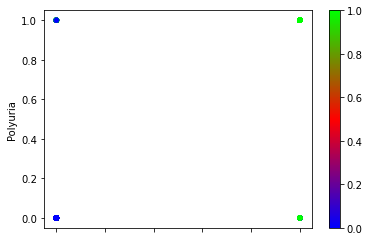

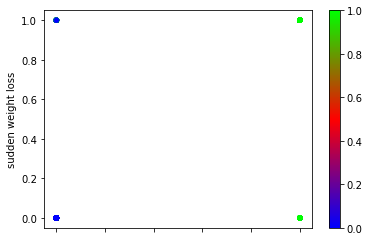

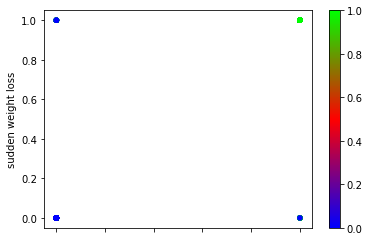

In [106]:
ax = diabetes_data_binary.plot(kind = 'scatter', x = 'Polydipsia', y = 'Polyuria', c = _Y, colormap = plt.cm.brg)
ax = diabetes_data_binary.plot(kind = 'scatter', x = 'Polydipsia', y = "sudden weight loss", c = _Y, colormap = plt.cm.brg)
ax = diabetes_data_binary.plot(kind = 'scatter', x = 'Polyuria', y = 'sudden weight loss', c = _Y, colormap = plt.cm.brg)

In [107]:
#DBSCAN 

In [108]:
clustering = DBSCAN(eps = 1, min_samples = 20, metric = "euclidean").fit(_X_scaled)
clusters = clustering.labels_
print(clusters)

[ 0  1  2  3  4  5  5  4  5 -1  5  5  2  4  5  5  4  0  5  4  5  4  6 -1
  4  1  1  4  0  4  4  4  1  4  5  5  2  4  6  6 -1  4  0  4  4  3  4  4
  4  6  4  4 -1 -1  1  1  4  1  1  5  5  4  5  6  1  6  5 -1  1  4  3 -1
  1  4  4  4  4  4  4  4  5  3  5  5  4  3  4  1  5  1  1  4  4  5  5  5
  4  4  5  5  4  4 -1  6  6  6 -1  6  5  5  3  4  4 -1  6  4  4  5  5  5
  5  5  0  0  6  4  5  2  0  4  4  2  4  6  4  1  1  4  4  2  5  5  4  6
  5  2  5  2  0  5  4  5  0  0  2  0  4  4  6  4  1  5  1  1  4  4  4  4
  1  4  5  5  2  4  6  6 -1  4  0  4  4  4  5  5  4  4 -1  6  6  6 -1  5
  0  2  3  2  1  2  6  4 -1  3  1  1  1  2  1  1  3  3  1  1  1  0  1  1
  1  2  1  1  1  1  3  1  1  1  1  3  1  1  3  1  0  1  1  1  1  1  1  1
  1  2  1  1  1  1  1  1  1  4  4  4  4  4  5  3  5  5  4  2  0  4  4  6
  4  1  5  1  1  4  4  4  1  1  1  2  1  1  1  1  3  1  1  1  2  1  1  1
  1  3  1  1  1  1  1  4  4  4  4  4  5  3  2  6  4 -1  3  1  1  1  2  1
  1  3  3  1  1  1  1  3  1  1  1  6  1  1  1  1  0

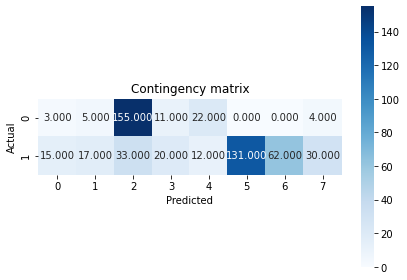

In [109]:
cont_matrix = metrics.cluster.contingency_matrix(_Y, clusters)
sns.heatmap(cont_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Contingency matrix')
plt.tight_layout()

In [110]:
adjusted_rand_index = metrics.adjusted_rand_score(_Y, clusters)
silhouette_coefficient = metrics.silhouette_score(_X_scaled, clusters, metric = "euclidean")
print([adjusted_rand_index, silhouette_coefficient])

[0.2408724695109245, 1.0]


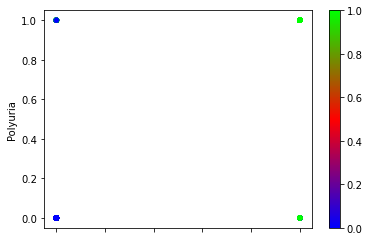

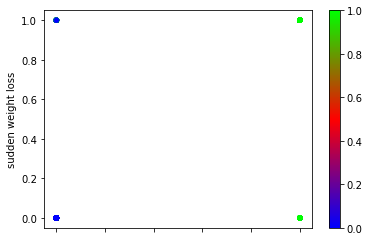

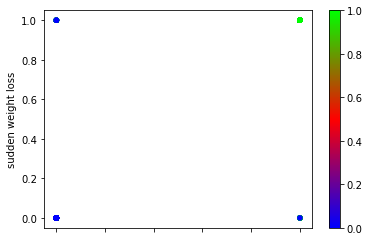

In [111]:
ax = diabetes_data_binary.plot(kind = 'scatter', x = 'Polydipsia', y = 'Polyuria', c = _Y, colormap = plt.cm.brg)
ax = diabetes_data_binary.plot(kind = 'scatter', x = 'Polydipsia', y = "sudden weight loss", c = _Y, colormap = plt.cm.brg)
ax = diabetes_data_binary.plot(kind = 'scatter', x = 'Polyuria', y = 'sudden weight loss', c = _Y, colormap = plt.cm.brg)

In [119]:
clustering = DBSCAN(eps = 1, min_samples = 100, metric = "euclidean").fit(_X_scaled)
clusters = clustering.labels_
print(clusters)

[-1  0 -1 -1  1 -1 -1  1 -1 -1 -1 -1 -1  1 -1 -1  1 -1 -1  1 -1  1 -1 -1
  1  0  0  1 -1  1  1  1  0  1 -1 -1 -1  1 -1 -1 -1  1 -1  1  1 -1  1  1
  1 -1  1  1 -1 -1  0  0  1  0  0 -1 -1  1 -1 -1  0 -1 -1 -1  0  1 -1 -1
  0  1  1  1  1  1  1  1 -1 -1 -1 -1  1 -1  1  0 -1  0  0  1  1 -1 -1 -1
  1  1 -1 -1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1 -1 -1  1  1 -1 -1 -1
 -1 -1 -1 -1 -1  1 -1 -1 -1  1  1 -1  1 -1  1  0  0  1  1 -1 -1 -1  1 -1
 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1  1  1 -1  1  0 -1  0  0  1  1  1  1
  0  1 -1 -1 -1  1 -1 -1 -1  1 -1  1  1  1 -1 -1  1  1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1  0 -1 -1  1 -1 -1  0  0  0 -1  0  0 -1 -1  0  0  0 -1  0  0
  0 -1  0  0  0  0 -1  0  0  0  0 -1  0  0 -1  0 -1  0  0  0  0  0  0  0
  0 -1  0  0  0  0  0  0  0  1  1  1  1  1 -1 -1 -1 -1  1 -1 -1  1  1 -1
  1  0 -1  0  0  1  1  1  0  0  0 -1  0  0  0  0 -1  0  0  0 -1  0  0  0
  0 -1  0  0  0  0  0  1  1  1  1  1 -1 -1 -1 -1  1 -1 -1  0  0  0 -1  0
  0 -1 -1  0  0  0  0 -1  0  0  0 -1  0  0  0  0 -1

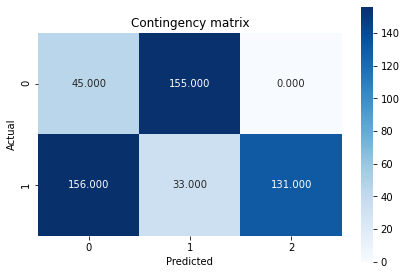

In [120]:
cont_matrix = metrics.cluster.contingency_matrix(_Y, clusters)
sns.heatmap(cont_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Contingency matrix')
plt.tight_layout()

In [121]:
adjusted_rand_index = metrics.adjusted_rand_score(_Y, clusters)
silhouette_coefficient = metrics.silhouette_score(_X_scaled, clusters, metric = "euclidean")
print([adjusted_rand_index, silhouette_coefficient])

[0.28509423937005157, 0.5943245574143279]


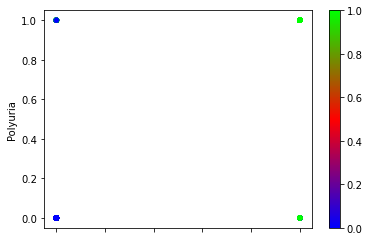

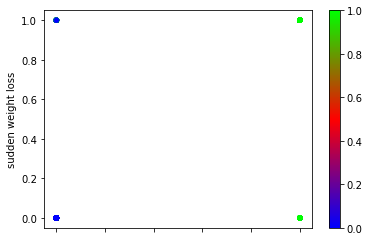

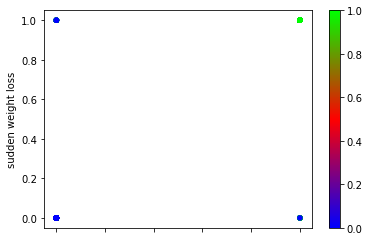

In [122]:
ax = diabetes_data_binary.plot(kind = 'scatter', x = 'Polydipsia', y = 'Polyuria', c = _Y, colormap = plt.cm.brg)
ax = diabetes_data_binary.plot(kind = 'scatter', x = 'Polydipsia', y = "sudden weight loss", c = _Y, colormap = plt.cm.brg)
ax = diabetes_data_binary.plot(kind = 'scatter', x = 'Polyuria', y = 'sudden weight loss', c = _Y, colormap = plt.cm.brg)

In [123]:
#Evaluation Matrix

In [124]:
silhouette_coefficient = metrics.silhouette_score(_X, _Y, metric = "euclidean")
print(silhouette_coefficient)

0.3840790825512669


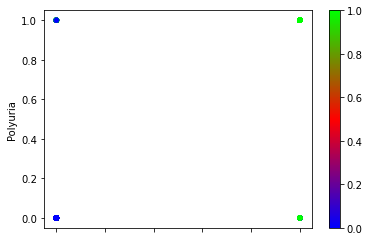

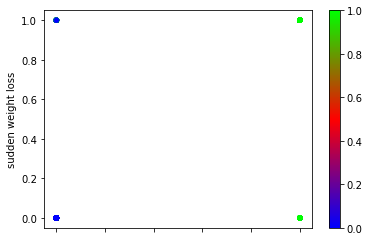

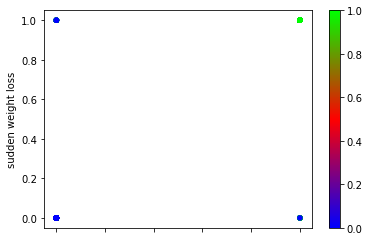

In [125]:
ax = diabetes_data_binary.plot(kind = 'scatter', x = 'Polydipsia', y = 'Polyuria', c = _Y, colormap = plt.cm.brg)
ax = diabetes_data_binary.plot(kind = 'scatter', x = 'Polydipsia', y = "sudden weight loss", c = _Y, colormap = plt.cm.brg)
ax = diabetes_data_binary.plot(kind = 'scatter', x = 'Polyuria', y = 'sudden weight loss', c = _Y, colormap = plt.cm.brg)